<a href="https://colab.research.google.com/github/JoeUzo/Analysis/blob/main/Google%20Trends%20and%20Data%20Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends provides an estimate of search volume. This notebook will explore whether search popularity correlates with other types of data. For example, there might be patterns between Google's search volume and the price of Bitcoin or a popular stock like Tesla. Additionally, search volume for terms like "Unemployment Benefits" might provide insights into the actual unemployment rate.

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

In [ ]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.isna().values.any()

False

In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
df_btc_price.isna().values.any()

True

In [ ]:
df_btc_price[df_btc_price.VOLUME.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
print(f'Largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}' )

Largest BTC News Search: 100


In [ ]:
df_btc_search.isna().values.any()

False

In [ ]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
print(f'Largest value for "Unemployment Benefits" in Web Search: {df_unemployment.	UE_BENEFITS_WEB_SEARCH.max()}' )

Largest value for "Unemployment Benefits" in Web Search: 100


In [ ]:
df_unemployment.isna().values.any()

False

# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [ ]:
# df_btc_price = df_btc_price.dropna(inplace=True)
df_btc_price = df_btc_price.dropna()
df_btc_price.DATE

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2199    2020-09-24
2200    2020-09-25
2201    2020-09-26
2202    2020-09-27
2203    2020-09-28
Name: DATE, Length: 2203, dtype: object

### Convert Strings to DateTime Objects

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [ ]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search.MONTH.head()

0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

In [ ]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.MONTH.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.DATE.head()

<ipython-input-26-aeb924af10cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)


0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [ ]:
df_btc_monthly_avg = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly_avg.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

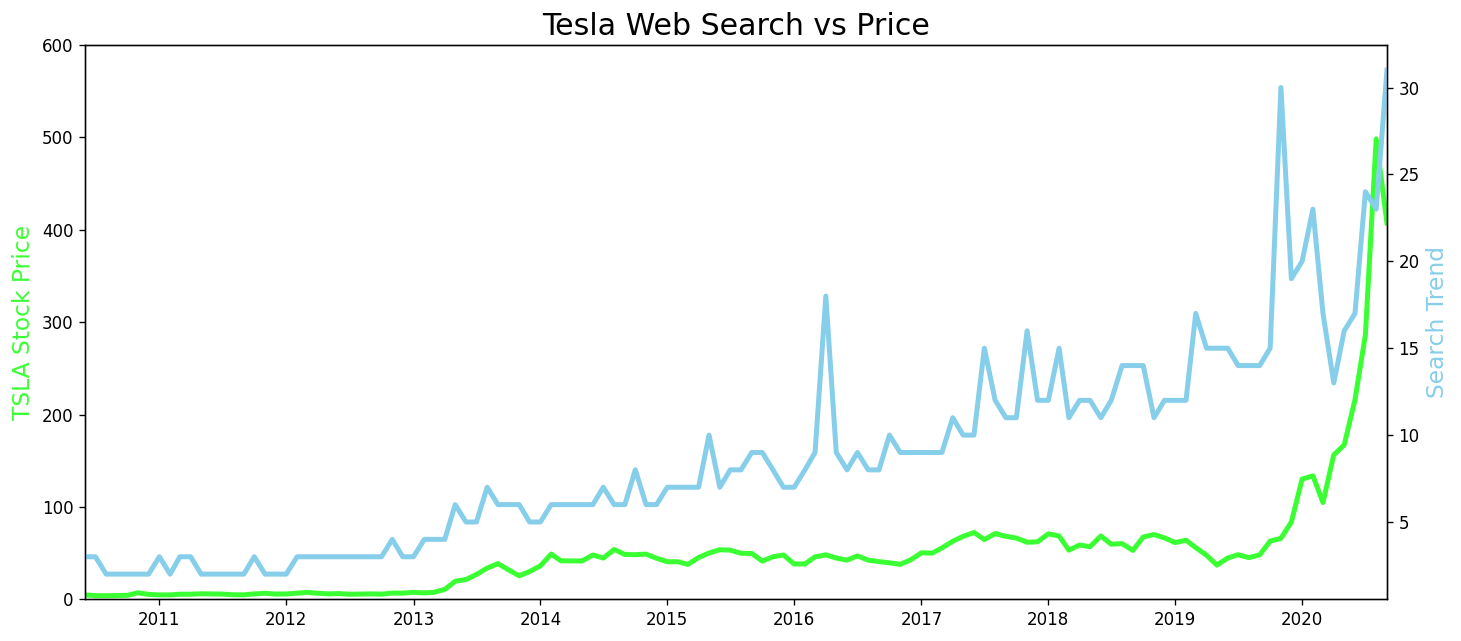

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#3AFF33', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#3AFF33', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
plt.show()


In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

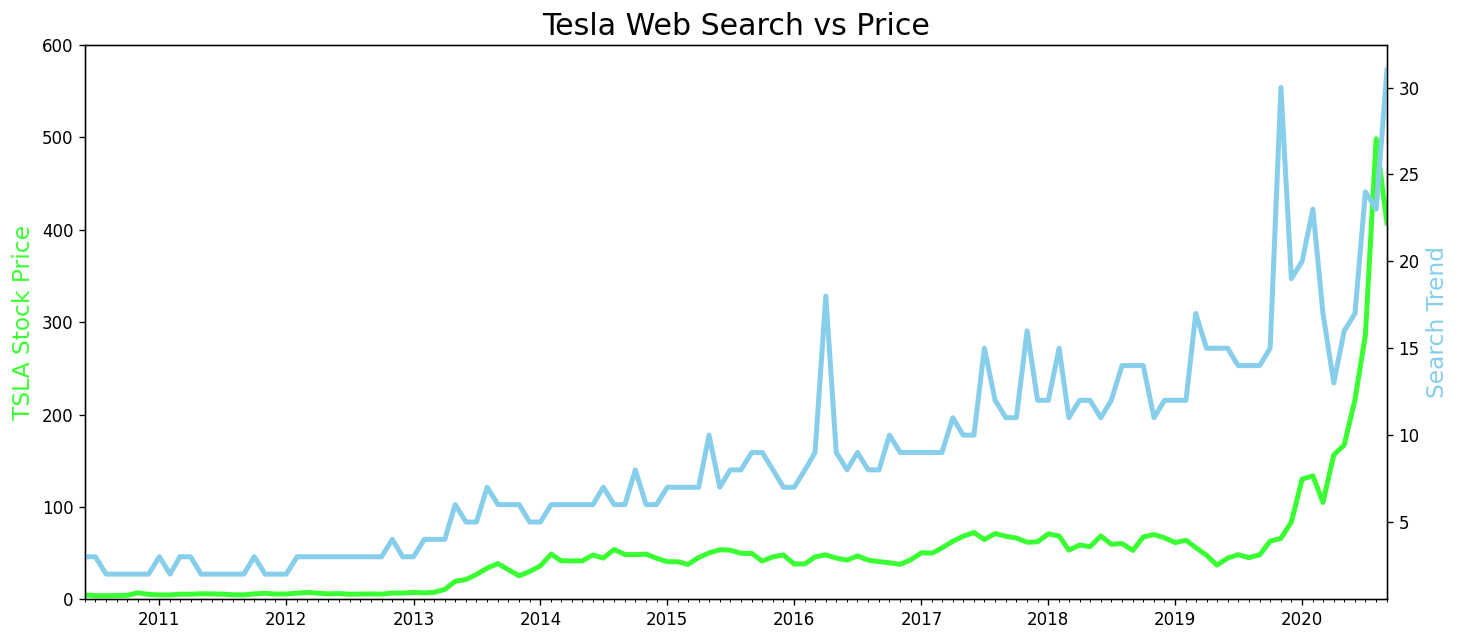

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#3AFF33', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#3AFF33', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
plt.show()


### Bitcoin (BTC) Price v.s. Search Volume

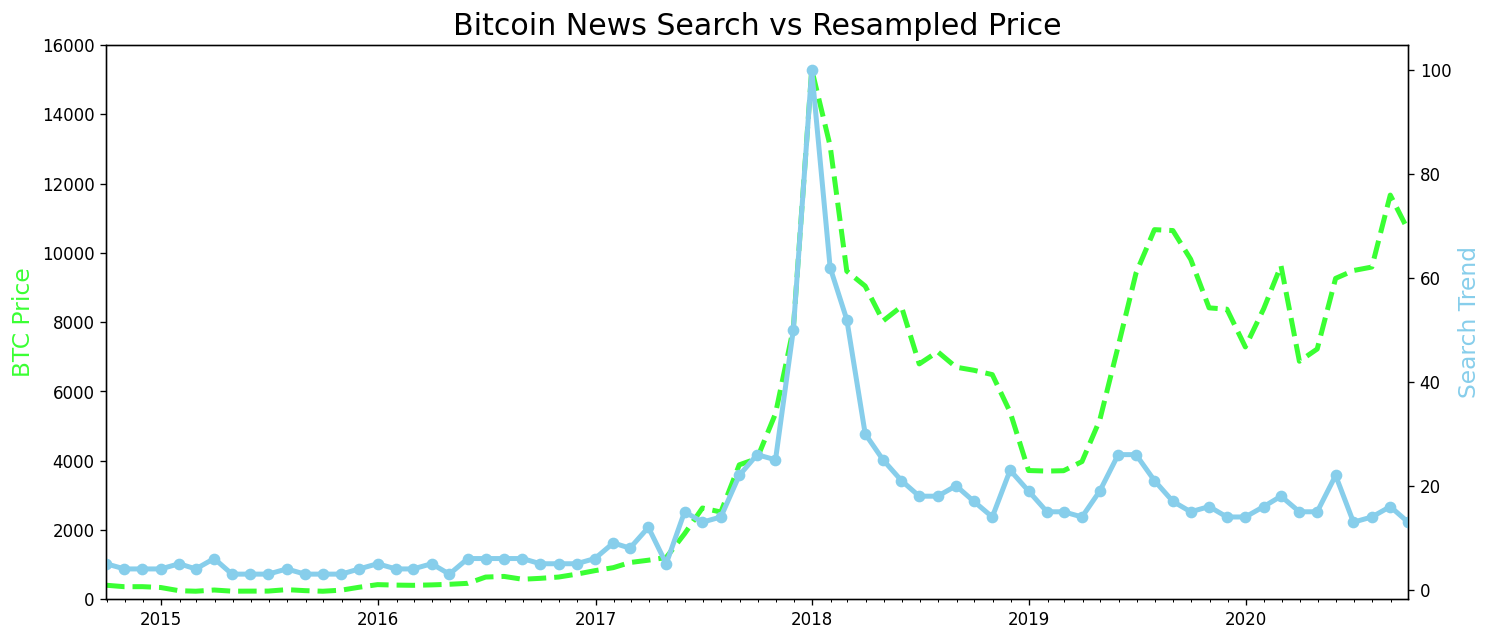

In [ ]:
plt.figure(figsize=(14,6), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#3AFF33', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 16000])
ax1.set_xlim([df_btc_monthly_avg.index.min(), df_btc_monthly.index.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly_avg.index, df_btc_monthly_avg.CLOSE, color='#3AFF33', linewidth=3, linestyle='dashed')
ax2.plot(df_btc_monthly_avg.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')
plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

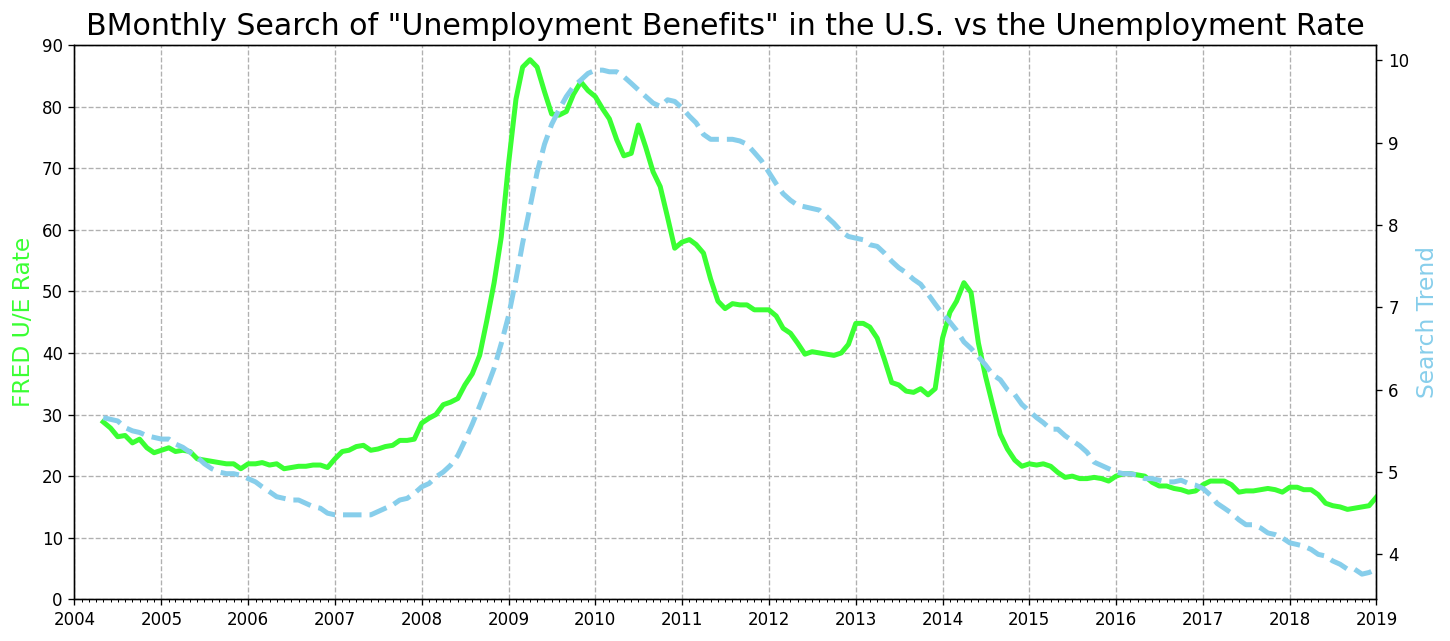

In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=5).mean()

plt.figure(figsize=(14,6), dpi=120)
plt.title('BMonthly Search of "Unemployment Benefits" in the U.S. vs the Unemployment Rate', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='#3AFF33', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 90])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(linestyle='--')

ax1.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='#3AFF33', linewidth=3)
ax2.plot(df_unemployment.MONTH, roll_df.UNRATE, color='skyblue', linewidth=3, linestyle='dashed')
plt.show()

### Including 2020 in Unemployment Charts

In [ ]:
df_ue_to_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
df_ue_to_2020.MONTH = pd.to_datetime(df_ue_to_2020.MONTH)

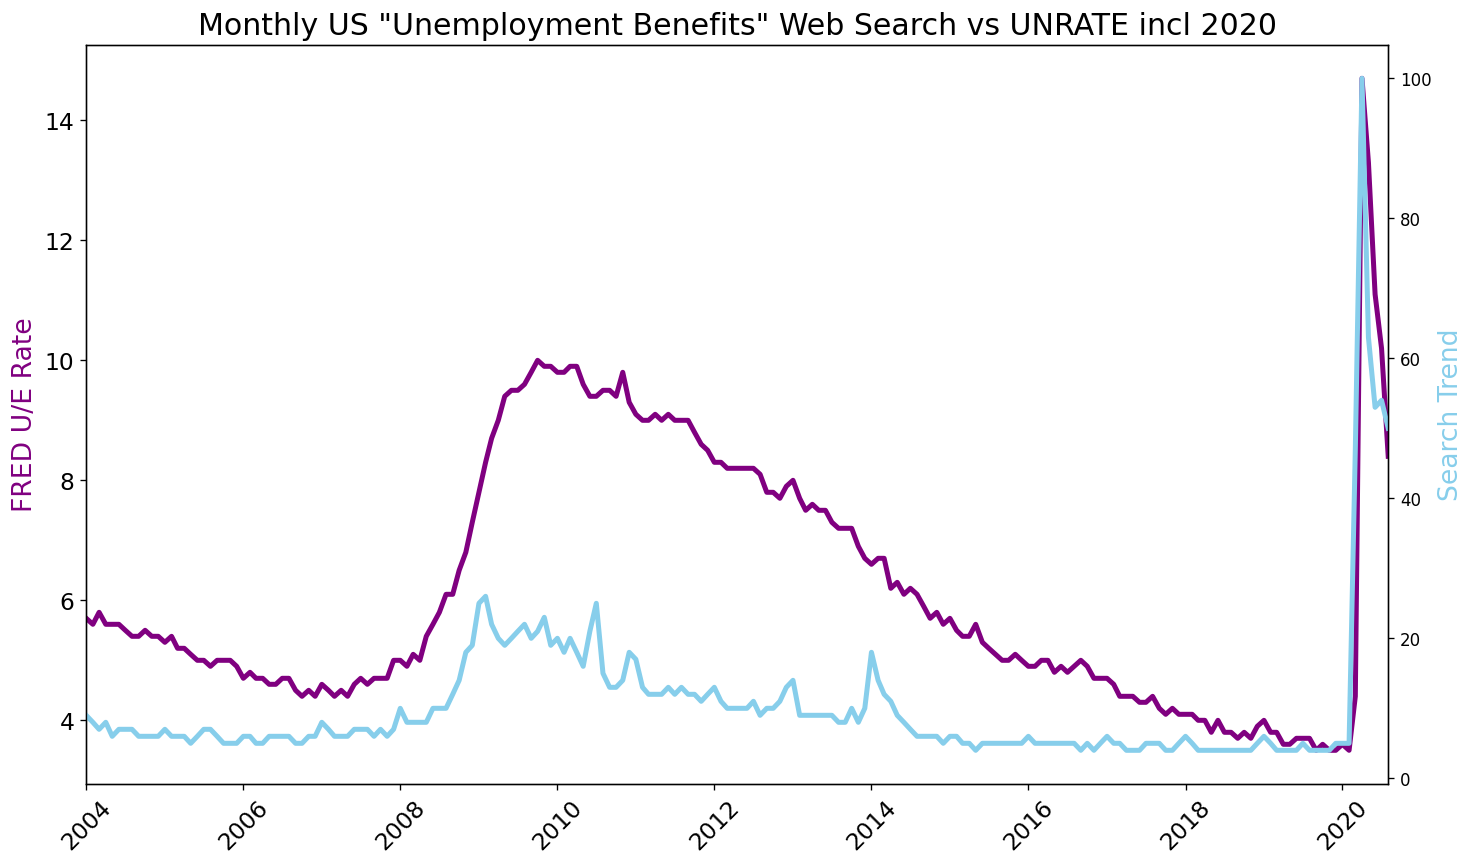

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_to_2020.MONTH.min(), df_ue_to_2020.MONTH.max()])

ax1.plot(df_ue_to_2020.MONTH, df_ue_to_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_to_2020.MONTH, df_ue_to_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()